In [4]:
import sentiment as sentimentinterface
import classify
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.switch_backend('agg')
import matplotlib.ticker as ticker
%matplotlib inline

import importlib

# 1. Read in data

In [5]:
importlib.reload(sentimentinterface)
print("Reading data")
tarfname = "data/sentiment.tar.gz"
sentiment = sentimentinterface.read_data(tarfname)

Reading data
-- train data
sentiment/train.tsv
4582
-- dev data
sentiment/dev.tsv
458
-- transforming data and labels


# 2. Imporve supervised model
## 2.1 Parameter search
### 2.1.1 Search for optimal max_df and min_df

In [181]:
importlib.reload(classify)
importlib.reload(sentimentinterface)

MAX_DF = np.arange(0.1, 1.1, 0.1)
MIN_DF = range(1, 20)
acc = []

for max_df in MAX_DF:
    for min_df in MIN_DF:
        sentimentinterface.vectorize_data(sentiment, max_df = max_df, min_df = min_df)
        cls = classify.train_classifier(sentiment.trainX, sentiment.trainy, C = 1.0)
        acc.append(classify.evaluate(sentiment.devX, sentiment.devy, cls, 'dev', verbose = False))

x = [max_df for max_df in MAX_DF for min_df in MIN_DF]
y = [min_df for max_df in MAX_DF for min_df in MIN_DF]
print("Max accuracy:", np.max(acc), "@ (max_df, min_df) = (" + str(x[np.argmax(acc)]) + ", " + str(y[np.argmax(acc)]) + ")")

Max accuracy: 0.7882096069868996 @ (max_df, min_df) = (0.4, 1)


Stop words @ max_df = 0.1 : {'of', 'you', 'but', 'service', 'with', 'to', 'that', 'are', 'so', 'in', 'food', 'they', 'my', 'have', 'good', 'is', 'had', 'this', 'it', 'at', 'for', 'very', 'not', 'here', 'the', 'was', 'we', 'on', 'place', 'great', 'and'}
Stop words @ max_df = 0.2 : {'this', 'of', 'in', 'it', 'place', 'and', 'for', 'my', 'to', 'is', 'was', 'the'}
Stop words @ max_df = 0.3 : {'this', 'of', 'in', 'and', 'for', 'to', 'is', 'was', 'the'}
Stop words @ max_df = 0.4 : {'and', 'the', 'to'}
Stop words @ max_df = 0.5 : {'and', 'the'}
Stop words @ max_df = 0.6 : {'and', 'the'}
Stop words @ max_df = 0.7 : {'the'}
Stop words @ max_df = 0.8 : set()
Stop words @ max_df = 0.9 : set()
Stop words @ max_df = 1.0 : set()


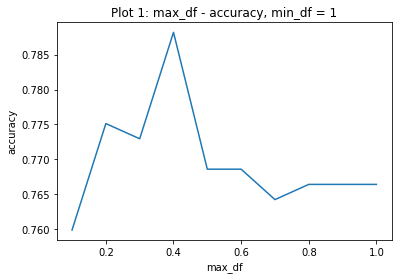

In [175]:
importlib.reload(classify)
importlib.reload(sentimentinterface)

acc = []
for max_df in MAX_DF:
    max_df = round(max_df, 3)
    sentimentinterface.vectorize_data(sentiment, max_df = max_df, min_df = 1)
    cls = classify.train_classifier(sentiment.trainX, sentiment.trainy, C = 1.0)
    acc.append(classify.evaluate(sentiment.devX, sentiment.devy, cls, 'dev', verbose = False))
    
    print("Stop words @ max_df =", max_df, ":", sentiment.count_vect.stop_words_)

plt.plot(MAX_DF, acc)
plt.title("Plot 1: max_df - accuracy, min_df = 1")
plt.xlabel("max_df")
plt.ylabel("accuracy")
plt.show()

Number of stop words @ min_df = 1 : 3
Number of stop words @ min_df = 2 : 5227
Number of stop words @ min_df = 3 : 6681
Number of stop words @ min_df = 4 : 7317
Number of stop words @ min_df = 5 : 7740
Number of stop words @ min_df = 6 : 8042
Number of stop words @ min_df = 7 : 8259
Number of stop words @ min_df = 8 : 8440
Number of stop words @ min_df = 9 : 8572
Number of stop words @ min_df = 10 : 8664
Number of stop words @ min_df = 11 : 8752
Number of stop words @ min_df = 12 : 8827
Number of stop words @ min_df = 13 : 8905
Number of stop words @ min_df = 14 : 8957
Number of stop words @ min_df = 15 : 8999
Number of stop words @ min_df = 16 : 9043
Number of stop words @ min_df = 17 : 9078
Number of stop words @ min_df = 18 : 9103
Number of stop words @ min_df = 19 : 9129


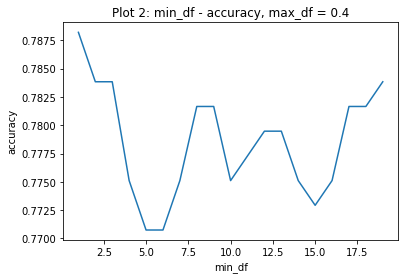

In [180]:
importlib.reload(classify)
importlib.reload(sentimentinterface)

acc = []
for min_df in range(1, 20):
    min_df = round(min_df, 3)
    sentimentinterface.vectorize_data(sentiment, max_df = 0.4, min_df = min_df)
    cls = classify.train_classifier(sentiment.trainX, sentiment.trainy, C = 1.0)
    acc.append(classify.evaluate(sentiment.devX, sentiment.devy, cls, 'dev', verbose = False))
    
    print("Number of stop words @ min_df =", min_df, ":", len(sentiment.count_vect.stop_words_))

plt.plot(range(1, 20), acc)
plt.title("Plot 2: min_df - accuracy, max_df = 0.4")
plt.xlabel("min_df")
plt.ylabel("accuracy")
plt.show()

In [194]:
sentimentinterface.count_word(sentiment, "was")

Count of was in positive comments: 700
Count of was in negative comments: 911


In [27]:
sentimentinterface.vectorize_data(sentiment)
C = np.arange(0.01, 10.01, 0.01)
acc = []
for c in C:
    cls = classify.train_classifier(sentiment.trainX, sentiment.trainy, C = c)
    acc.append(classify.evaluate(sentiment.devX, sentiment.devy, cls, 'dev', verbose = False))

Max accuracy: 0.7947598253275109 @ C = 4.09


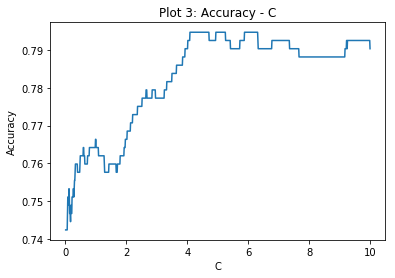

In [29]:
plt.plot(C, acc)
plt.title("Plot 3: Accuracy - C")
plt.xlabel("C")
plt.ylabel("Accuracy")
print("Max accuracy:", np.max(acc), "@ C =", C[np.argmax(acc)])

In [34]:
DIFF = np.arange(0, 1.01, 0.01)
acc = []
for diff in DIFF:
    stop_words = sentimentinterface.generate_stop_words(sentiment, diff = diff)
    sentimentinterface.vectorize_data(sentiment, stop_words = stop_words)
    cls = classify.train_classifier(sentiment.trainX, sentiment.trainy)
    acc.append(classify.evaluate(sentiment.devX, sentiment.devy, cls, 'dev', verbose = False))

Max accuracy: 0.8100436681222707 @ C = 0.33


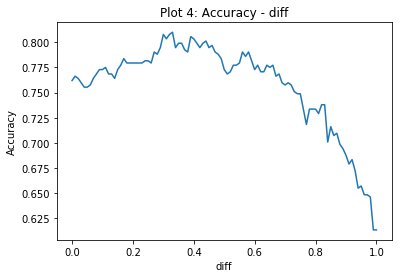

In [36]:
plt.plot(DIFF, acc)
plt.title("Plot 4: Accuracy - diff")
plt.xlabel("diff")
plt.ylabel("Accuracy")
print("Max accuracy:", np.max(acc), "@ C =", DIFF[np.argmax(acc)])

In [43]:
DIFF = np.arange(0, 1.01, 0.01)
MAX_DF = np.arange(0.1, 1.1, 0.1)
MIN_DF = range(1, 10)
C = np.arange(2.1, 6.1, 0.1)
acc = []

for diff in DIFF:
    diff = round(diff, 3)
    stop_words = sentimentinterface.generate_stop_words(sentiment, diff = diff)
    for max_df in MAX_DF:
        max_df = round(max_df, 3)
        for min_df in MIN_DF:
            min_df = round(min_df, 3)
            sentimentinterface.vectorize_data(sentiment, stop_words = stop_words, max_df = max_df, min_df = min_df)
            for c in C:
                cls = classify.train_classifier(sentiment.trainX, sentiment.trainy, C = c)
                acc.append(classify.evaluate(sentiment.devX, sentiment.devy, cls, 'dev', verbose = False))

In [44]:
D = [diff for diff in DIFF for max_df in MAX_DF for min_df in MIN_DF for c in C]
MAX = [max_df for diff in DIFF for max_df in MAX_DF for min_df in MIN_DF for c in C]
MIN = [min_df for diff in DIFF for max_df in MAX_DF for min_df in MIN_DF for c in C]
CC = [c for diff in DIFF for max_df in MAX_DF for min_df in MIN_DF for c in C]

opt_acc = np.max(acc)
opt_diff = D[np.argmax(acc)]
opt_max = MAX[np.argmax(acc)]
opt_min = MIN[np.argmax(acc)]
opt_c = CC[np.argmax(acc)]

opt_point = (opt_diff, opt_max, opt_min, opt_c)

print("Max accuracy:", opt_acc, "found @ (diff, max_df, min_df, c) = ", opt_point)

Max accuracy: 0.8187772925764192 found @ (diff, max_df, min_df, c) =  (0.4, 0.2, 3, 3.7000000000000015)


In [46]:
stop_words = sentimentinterface.generate_stop_words(sentiment, diff = opt_diff)
sentimentinterface.vectorize_data(sentiment, stop_words = stop_words, max_df = opt_max, min_df = opt_min)
cls = classify.train_classifier(sentiment.trainX, sentiment.trainy, C = opt_c)

classify.evaluate(sentiment.devX, sentiment.devy, cls, 'dev')
print("\nReading unlabeled data")
unlabeled = sentimentinterface.read_unlabeled(tarfname, sentiment)
print("Writing predictions to a file")
sentimentinterface.write_pred_kaggle_file(unlabeled, cls, "data/sentiment-pred.csv", sentiment)

  Accuracy on dev is: 0.8187772925764192

Reading unlabeled data
sentiment/unlabeled.tsv
(91524, 2123)
Writing predictions to a file


In [48]:
DIFF = np.arange(0.39, 0.41, 0.001)
MAX_DF = np.arange(0.19, 0.21, 0.001)
MIN_DF = range(2, 4)
C = np.arange(3.69, 3.71, 0.001)
acc = []

for diff in DIFF:
    diff = round(diff, 3)
    stop_words = sentimentinterface.generate_stop_words(sentiment, diff = diff)
    for max_df in MAX_DF:
        max_df = round(max_df, 3)
        for min_df in MIN_DF:
            min_df = round(min_df, 3)
            sentimentinterface.vectorize_data(sentiment, stop_words = stop_words, max_df = max_df, min_df = min_df)
            for c in C:
                cls = classify.train_classifier(sentiment.trainX, sentiment.trainy, C = c)
                acc.append(classify.evaluate(sentiment.devX, sentiment.devy, cls, 'dev', verbose = False))

In [49]:
D = [diff for diff in DIFF for max_df in MAX_DF for min_df in MIN_DF for c in C]
MAX = [max_df for diff in DIFF for max_df in MAX_DF for min_df in MIN_DF for c in C]
MIN = [min_df for diff in DIFF for max_df in MAX_DF for min_df in MIN_DF for c in C]
CC = [c for diff in DIFF for max_df in MAX_DF for min_df in MIN_DF for c in C]

opt_acc = np.max(acc)
opt_diff = D[np.argmax(acc)]
opt_max = MAX[np.argmax(acc)]
opt_min = MIN[np.argmax(acc)]
opt_c = CC[np.argmax(acc)]

opt_point = (opt_diff, opt_max, opt_min, opt_c)

print("Max accuracy:", opt_acc, "found @ (diff, max_df, min_df, c) = ", opt_point)

Max accuracy: 0.8187772925764192 found @ (diff, max_df, min_df, c) =  (0.392, 0.19, 3, 3.69)
